In [21]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/python/3.7.13/bin/python3.7 -m pip install --upgrade pip' command.


# Is this affecting the Abalone Population?

## Setup

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [43]:
from ucimlrepo import fetch_ucirepo   

# fetch dataset 
abalone = fetch_ucirepo(id=1) 

# data (as pandas dataframes) 
i_love_abalone = abalone.data.features 
abalone_rings = abalone.data.targets 

# variable information 
print(abalone.variables) 

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

## Exploring our data

In [27]:
# Abalone data metrics
i_love_abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [39]:
# Abalone ring metrics
abalone_rings.head() 

,Rings
0,15
1,7
2,9
3,10
4,7


In [40]:
# Any missing data in our abalone data data?
i_love_abalone.isnull().sum() # no! :) 

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [41]:
# Any missing data in our abalone ring data?
abalone_rings.isnull().sum() # no! :)

Rings    0
dtype: int64

Our data consists of 2 different dataframes of equal sizes. The authors of this set decided to split the `rings` data from the rest of the metrics. We will be joining them together.

### Joining data together

Concatenating them instead of using merge since they don't share any common index but the datasets are of the same lengths.

In [38]:
i_love_abalone_deluxe = pd.concat([abalone_rings, i_love_abalone], axis = 1) # concat via columns
i_love_abalone_deluxe.head()

,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,15,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,7,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,9,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,10,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,7,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### Sorting by rings

In [64]:
i_love_abalone_deluxe_sorted = i_love_abalone_deluxe.sort_values(by = 'Rings', ascending = False).copy()
i_love_abalone_deluxe_sorted.head()

,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
480,29,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475
2209,27,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525
2108,27,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885
294,26,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375
2201,25,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.510


## What about abalone do we care about?
Lets predict age from physical measurements!

#### What is the distribution of abalone based on ring size?

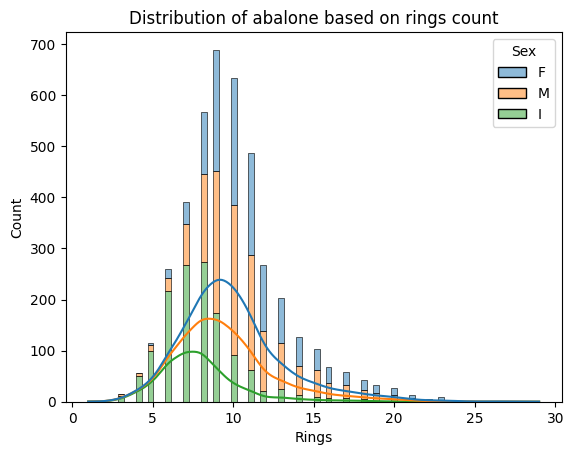

In [69]:
fig = plt.figure()
sns.histplot(data = i_love_abalone_deluxe_sorted, x = 'Rings', kde = True, hue = 'Sex', multiple = 'stack')
plt.title('Distribution of abalone based on rings count')
plt.show()

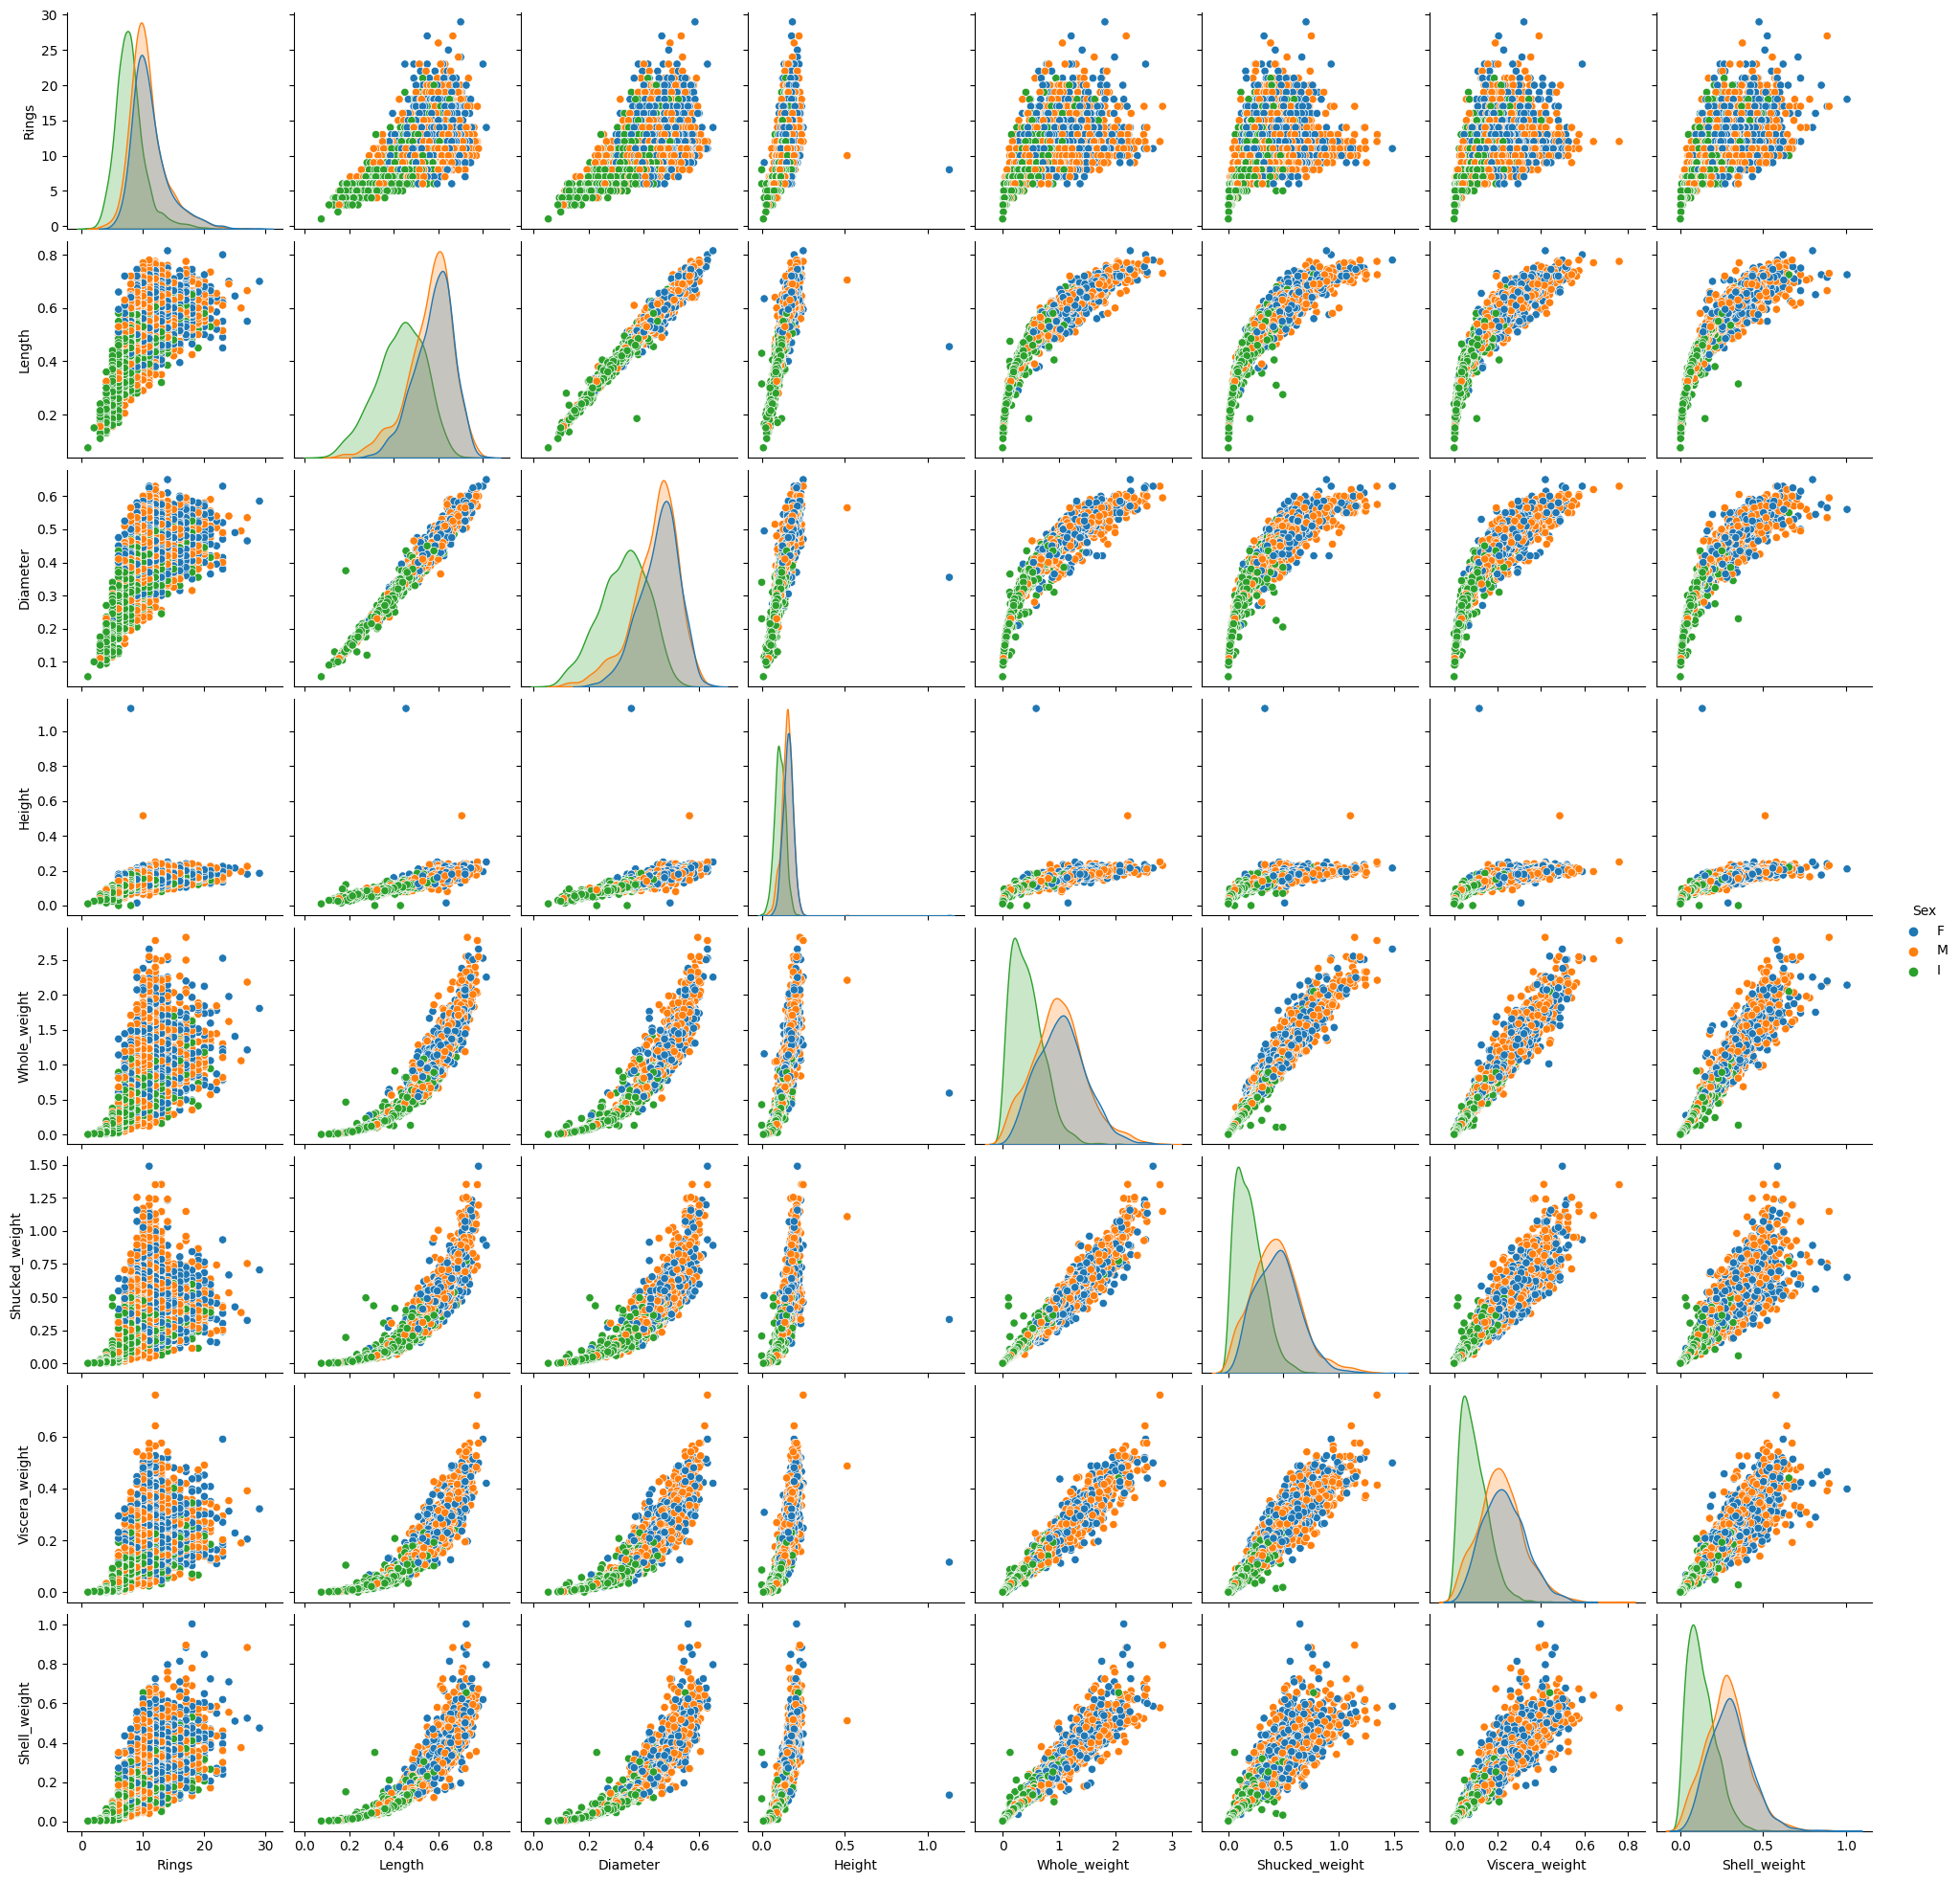

In [67]:
sns.pairplot(i_love_abalone_deluxe_sorted, hue = 'Sex')
plt.show()

In [ ]:
### What is the correlation between 

In [80]:
corr_abalone = (i_love_abalone_deluxe_sorted
                 .select_dtypes(include=['float64', 'int64'])
                 .corr())

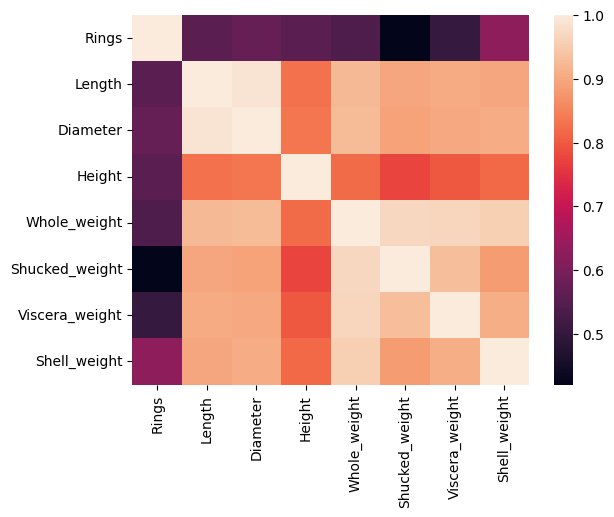

In [81]:
sns.heatmap(corr_abalone)
plt.show()

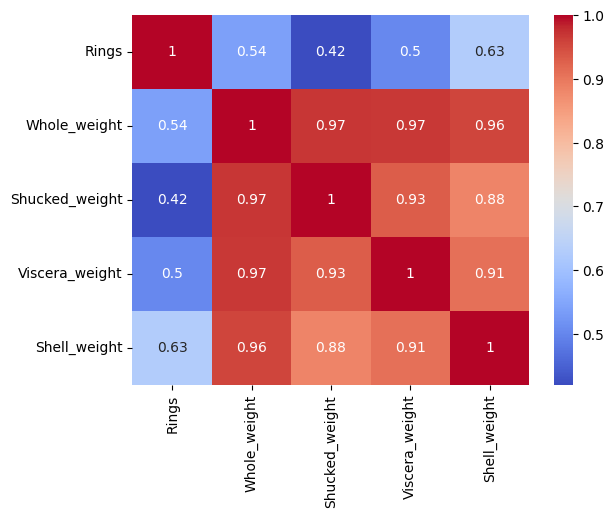

In [89]:
# Subsetting the original DataFrame
subset_abalone = i_love_abalone_deluxe_sorted[['Rings', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]

# Calculating the correlation matrix for the subset
subset_corr_abalone = subset_abalone.corr()

# Plotting the heatmap
sns.heatmap(subset_corr_abalone, annot=True, cmap="coolwarm")
plt.show()

#### Does shell weight increase as rings increase?

In [70]:
#fig = plt.figure()
#sns.regplot(data = i_love_abalone_deluxe, x = 'Rings', y = 'Shell_weight', scatter_kws={"color": "black"}, line_kws={"color": "red"})
#plt.show()

In [76]:
#fig = plt.figure()
#sns.violinplot(x='Rings', y='Shell_weight', hue='Sex', data=i_love_abalone_deluxe_sorted, multiple = 'stack')
#plt.title("Violin Plot of Rings by Shell Weight, Split by Sex (Male/Female)")
#plt.show()